In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('predictive_maintenance.csv')

# Check for missing values and basic statistics
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
print(data.isnull().sum())


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numeric columns for scaling
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Standardization (z-score)
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Or use MinMaxScaler for normalization
# scaler = MinMaxScaler()
# data[numeric_features] = scaler.fit_transform(data[numeric_features])


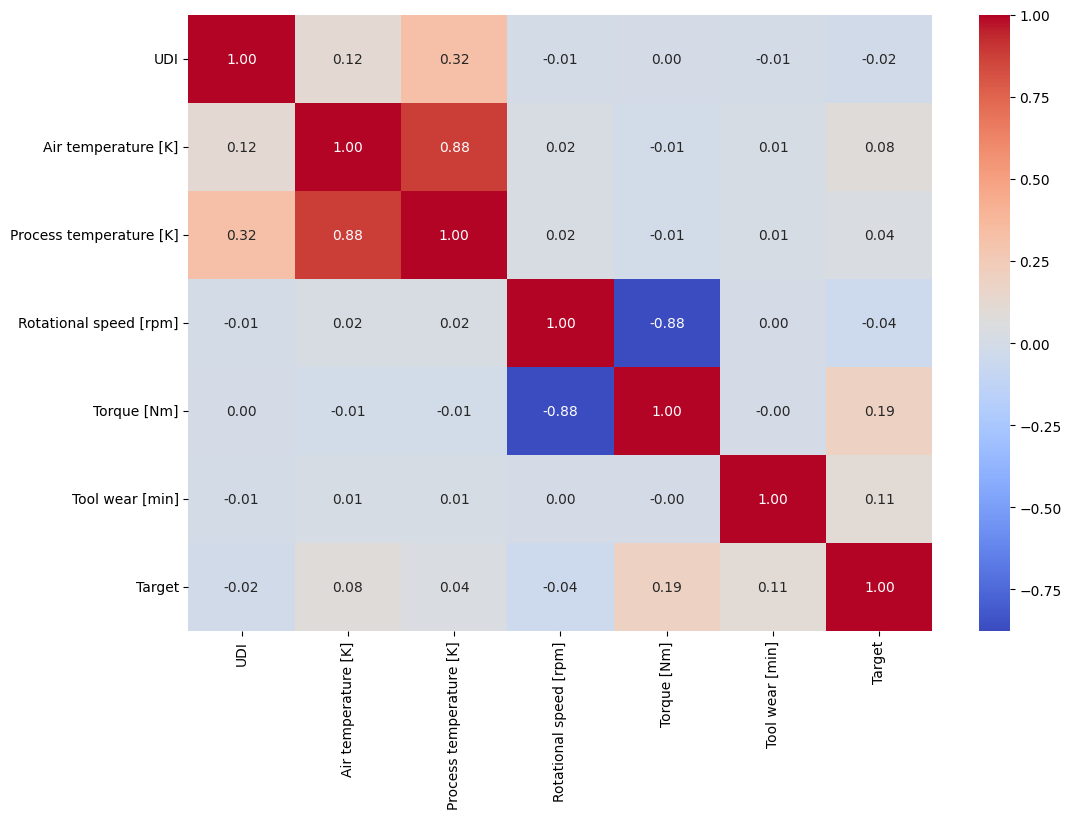

In [8]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Display correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


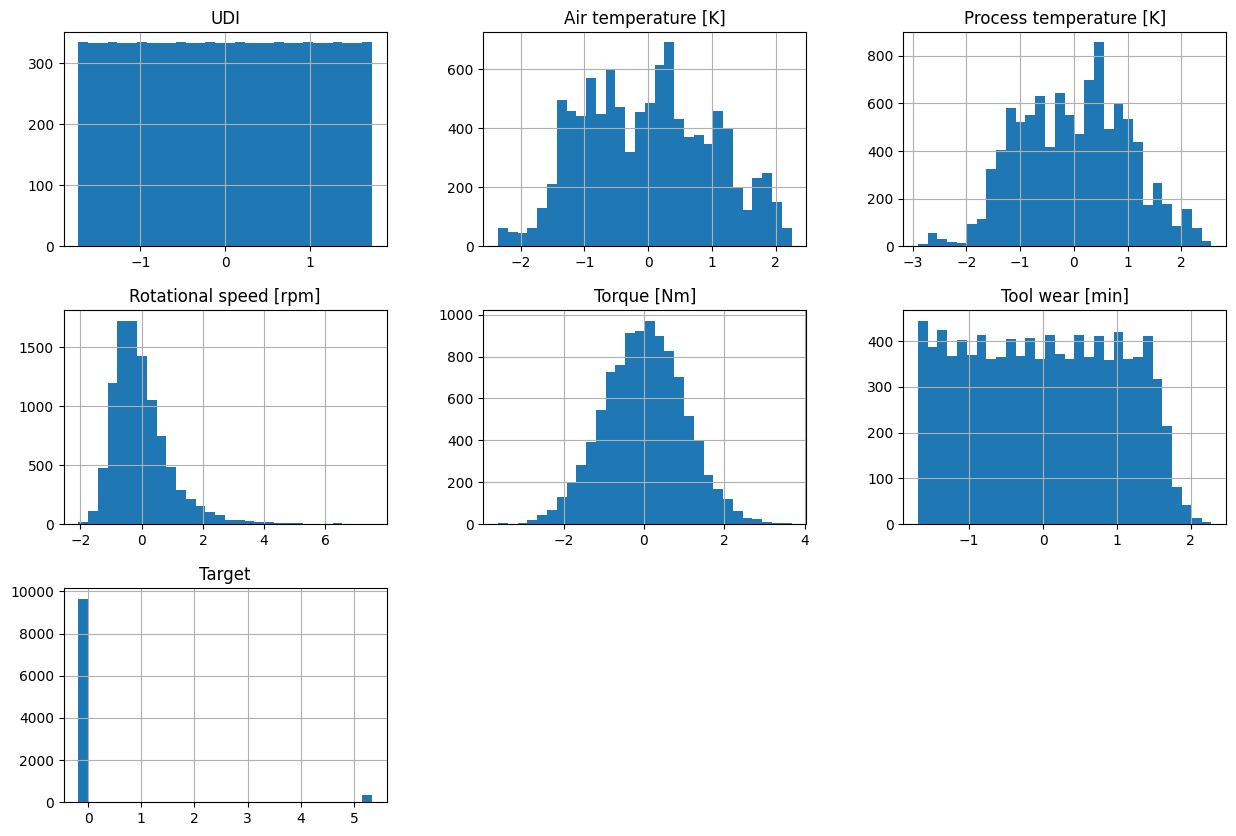

In [10]:
# Plot histograms for each feature
data.hist(bins=30, figsize=(15, 10))
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder

# Convert all categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()

# Apply to all categorical columns, if necessary
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])


In [30]:
# One-Hot Encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)


In [31]:
# Fill missing values with the median for numerical columns
X.fillna(X.median(), inplace=True)

# Or, drop rows with missing values
# X.dropna(inplace=True)


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

class DNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Define the model
input_size = X.shape[1]  # Number of features
num_classes = len(y.unique())  # Number of classes
model = DNN(input_size, num_classes)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Example of a RandomForestClassifier tuning (you can apply this for your model)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Apply GridSearch
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters: ", grid_search.best_params_)


ValueError: 
All the 24 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 419, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.
